In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
import pydub as pd
import sounddevice as sd
import os
import random
import math
import tensorflow as tf
from scipy.io.wavfile import write
from keras.optimizers import Adam, RMSprop
from keras import layers
from tensorflow import keras
from keras.layers import LSTM, Dense, TimeDistributed, RepeatVector, Flatten, Reshape, BatchNormalization, Bidirectional, AveragePooling1D, Activation, Attention, SimpleRNN, Conv1D, Conv1DTranspose, Conv2D, Conv2DTranspose, UpSampling1D, MaxPooling1D
from keras.activations import relu, tanh, linear, softmax, elu
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, CuDNNGRU
from keras import Sequential, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pennylane as qml



2022-11-25 14:50:58.954395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 14:50:59.188924: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-25 14:51:00.140539: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-25 14:51:00.140642: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
path = r'/home/dgx/Desktop/racoon/music_generate/music001'
music = []
music_list = os.listdir(path=path)
for num in range(len(os.listdir(path=path))):
    print('Loading Music:', music_list[num])
    music.append(lb.load(os.path.join(path, music_list[num])))
    print('Finished')

Loading Music: Tchaikovsky - Piano Concerto No. 1.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Daniel_Veesey_-_04_-_Sonata_No_1_in_F_Minor_Op_2_No_1_-_IV_Prestissimo.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Aaron_Dunn_-_Goldberg_Variations_BWV_988_-_Aria.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Brendan_Kinsella_-_01_-_Bach_-_Aria_Variata_BWV_989_Variation_no1.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Daniel_Veesey_-_Sonata_No_22_in_F_Major_Op_54_-_II_Allegretto.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Brendan_Kinsella_-_Mozart_-_Piano_Sonata_in_B-flat_major_III_Allegretto_Grazioso.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Daniel_Veesey_-_01_-_Sonata_No_1_in_F_Minor_Op_2_No_1_-_I_Allegro.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Brendan_Kinsella_-_02_-_Bach_-_Aria_Variata_BVW_989_-_Variation_No_2.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Daniel_Veesey_-_03_-_Sonata_No_1_in_F_Minor_Op_2_No_1_-_III_Menuetto_Allegretto.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Tchaikovsky - Romance in F Minor, Op. 5 - Sviatoslav Richter Piano.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: ▓Ўе╛пS(MOZART)-дpмPмP┼▄л╡ж▒.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Tchaikovsky бV Swan Lake.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Brendan_Kinsella_-_03_-_Bach_-_Aria_Variata_BVW_989_-_Variation_No_3.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Brendan_Kinsella_-_Mozart_-_Sonata_No_13_In_B_Flat_Major_K333_-_II_Andante_Cantabile.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Piano-Concerto-no.-21-in-C-major-K.-467-II.-Andante.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Tchaikovsky - Waltz of the Flowers (The Nutcracker Suite).mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Mozart Piano Sonata No 16 C major K 545 Barenboim.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Karine_Gilanyan_-_Beethoven_-_Piano_Sonata_nr15_in_D_major_op28_Pastoral_-_III_Scherzo_Allegro_Vivace.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Tchaikovsky - Dance of the Sugar Plum Fairy (The Nutcracker Suite).mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished
Loading Music: Carlos_Gardels_-_01_-_Bach_-_Book_I_Prelude_and_Fugue_No_8_in_E_Flat_Minor_BWV_853_Prelude.mp3


/home/dgx/anaconda3/envs/racooon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Finished


In [3]:
class music_process:
    def __init__():
        super.__init__()
    def ran_music_seq(data, sec, ff=22050):
        sequence = sec*ff
        start = random.randint(0, (len(data[0])-sequence))
        result = []
        for lent in range(sequence):
          result.append(data[0][start])
          start+=1
        return result
    def half_samplerate(data):
        result = []
        for num in range(len(data)):
            if num%2==0:
                result.append(data[num])
        return result
    def double_samplerate(data):
        result = []
        for num in range(len(data)):
            result.append(data[num])
            result.append(data[num])
        return result
    def normalize_freq(data, sample_rate):
        normal_result = []
        for dot in data:
            normal_result.append(dot/sample_rate)
        return normal_result




In [4]:
# 20sec 22050
train_data = []
for i in range(len(music)):
    for num in range(50):
        train_data.append(music_process.ran_music_seq(music[i], 20))

In [5]:
# scaler = MinMaxScaler().fit(train_data)
# train_data = scaler.transform(train_data)


In [ ]:
sample_rate = 22050
sample_sec = 20
metr = 'mae', 'msle', 'mape'
data_train = np.array(train_data)
train, test = train_test_split(data_train, train_size = 0.8)
train = np.reshape(train, (train.shape[0] ,sample_sec, sample_rate))

In [64]:
with tf.distribute.MirroredStrategy().scope():   
    model = Sequential()
    model.add(Input((sample_sec, sample_rate)))
    model.add(Bidirectional(LSTM(1024 ,return_sequences= True)))
    model.add(Activation(tanh))
    model.add(Conv1D(512, 5,activation='relu'))
    model.add(Bidirectional(CuDNNLSTM(512 ,return_sequences= True)))
    model.add(Activation(tanh)) 
    model.add(BatchNormalization())
    model.add(Conv1D(256, 5, activation='relu'))  
    model.add(BatchNormalization())
    model.add((Conv1D(128, 5, activation='relu')))
    model.add(Dense(64, activation='relu'))
    model.add(MaxPooling1D((2)))
    model.add((Conv1DTranspose(64, 3)))
    model.add(Activation(relu))
    model.add(BatchNormalization())
    model.add(Conv1DTranspose(128, 3, activation='relu'))
    model.add(Conv1DTranspose(256, 3, activation='relu'))
    model.add(Bidirectional(CuDNNLSTM(512,  return_sequences=True)))
    
    model.add(BatchNormalization())
    model.add(Bidirectional(CuDNNLSTM(1024, return_sequences=True)))
    model.add(Activation(tanh))
    model.add(UpSampling1D(2))
    model.add(TimeDistributed(Dense(sample_rate, activation='tanh')))
    keras.utils.plot_model(model, show_shapes = True, to_file='mode2.png')
    model.compile(optimizer = Adam(0.0001),
                  loss = 'mae',
                  metrics=  [metr])
    history = model.fit(train,train, batch_size = 200, epochs = 2000)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


Epoch 1/2000
4/4 [==============================] - 46s 369ms/step - loss: 0.4905 - mae: 0.4905 - msle: 0.1439 - mape: 70386.6641
Epoch 2/2000
4/4 [==============================] - 1s 369ms/step - loss: 0.4346 - mae: 0.4346 - msle: 0.1191 - mape: 88702.7500
Epoch 3/2000
4/4 [==============================] - 1s 375ms/step - loss: 0.2802 - mae: 0.2802 - msle: 0.0594 - mape: 200038.8438
Epoch 4/2000
4/4 [==============================] - 1s 384ms/step - loss: 0.1575 - mae: 0.1575 - msle: 0.0186 - mape: 463785.5000
Epoch 5/2000
4/4 [==============================] - 1s 363ms/step - loss: 0.1478 - mae: 0.1478 - msle: 0.0138 - mape: 574281.6250
Epoch 6/2000
4/4 [==============================] - 1s 333ms/step - loss: 0.1086 - mae: 0.1086 - msle: 0.0086 - mape: 528108.9375
Epoch 7/2000
4/4 [==============================] - 1s 336ms/step - loss: 0.0967 - mae: 0.0967 - msle: 0.0071 - mape: 436642.1875
Epoch 8/2000
4/4 [==============================] - 1s 384ms/step - loss: 0.0873 - mae: 0.0

KeyboardInterrupt: 

In [ ]:
with tf.distribute.MirroredStrategy().scope():
    # mp3
    mp3inputs = layers.Input((sample_rate))
    mp3l1 = Dense(1024, activation='relu')(mp3inputs)
    mp3l2 = Dense(512, activation='relu')(mp3l1)
    mp3l3 = Dense(256, activation='relu')(mp3l2)
    mp3bn = Dense(128, activation='relu')(mp3l3)
    # midi
    midiinputs = layers.Input(1)
    midil1 = Dense(1, activation='relu')(midiinputs)
    midil2 = Dense(10, activation='relu')(midil1)
    midil3 = Dense(64, activation='relu')(midil2)
    midibn = Dense(128, activation='relu')(midil3)
    # BottleNeck-Attention
    atten = Attention()([mp3bn, midibn])
    dec1 = Dense(256, activation='relu')(atten)
    dec2 = Dense(512, activation='relu')(dec1)
    dec3 = Dense(1024, activation='relu')(dec2)
    outputs = Dense(sample_rate, activation='relu')(dec3)
    model = keras.Model(inputs = (mp3inputs, midiinputs), outputs = outputs)
    keras.utils.plot_model(model,show_shapes=False, to_file='model1.png')

In [ ]:
with tf.distribute.MirroredStrategy().scope():   
    model = Sequential()
    inputs = layers.Input((20, sample_rate))
    l1 = CuDNNLSTM(1024, return_sequences = True )(inputs)
    l2 = Conv1D(512, 3, activation = 'tanh')(l1)
    l3 = Activation(tanh)(l2)
    l4 = BatchNormalization()(l3)
    l5 = CuDNNLSTM(256, return_sequences = True)(l4)
    l6 = Activation(tanh)(l5)
    l7 = Conv1D(128, 3, activation = 'tanh')(l6)
    l8 = MaxPooling1D(4)(l7)
    l9 = BatchNormalization()(l8)
    l10 = Conv1D(64, 3, activation = 'tanh')(l9)
    l11 = Dense(32, activation = 'tanh')(l10)
    # att = Attention()([l1, l11])
    l12 = Conv1DTranspose(64 ,3, activation = 'tanh')(l11)
    l13 = UpSampling1D(4)(l12)
    l14 = Conv1DTranspose(128 ,3, activation = 'tanh')(l13)
    l15 = BatchNormalization()(l14)
    l16 = Conv1DTranspose(256 ,3, activation = 'tanh')(l15)
    l17 = CuDNNLSTM(512 , return_sequences = True)(l16)
    att1 = Attention()([l2, l17])
    l18 = BatchNormalization()(att1)
    l19 = CuDNNLSTM(1024 , return_sequences = True)(l18)
    att2 = Attention()([l1, l19])
    l20 = Activation(tanh)(att2)
    outputs = (Dense(sample_rate, ))(l20)

    model = keras.Model(inputs = inputs, outputs = outputs)
    # keras.utils.plot_model(model, show_shape = True, to_file='model.png')
    metr = 'acc'
    model.compile(optimizer = Adam(0.0001, ),
                  loss = 'mse',
                  metrics=  [metr])
    history = model.fit(train, train, epochs = 1000, batch_size = 200)


In [26]:
def plot_model(metr, show = True, save_path = None):
    for seq in metr:
        plt.plot( history.history[seq])
    plt.title('Model Metrices')
    plt.legend(metr)
    plt.ylabel('Metrices')
    plt.xlabel('Epoch')
    # plt.legend(['Train', 'Test'], loc='upper left')
    if show == True:
        plt.show()
    if save_path!=None:
        plt.savefig(save_path+'mertices.png')
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    if show == True:
        plt.show()
    if save_path!=None:
        plt.savefig(save_path+'loss.png')

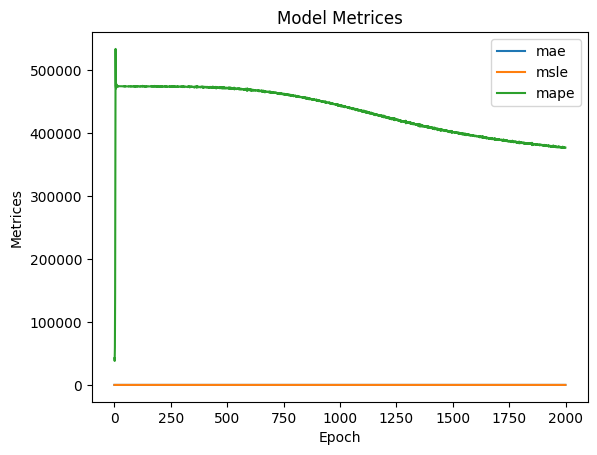

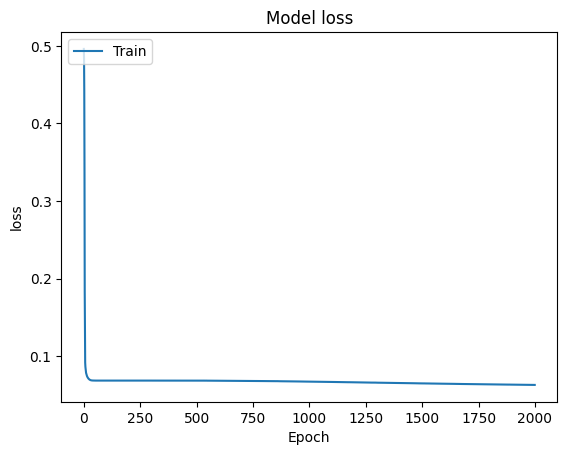

In [59]:
plot_model(metr, True)

In [60]:
pre = model.predict(train)
pre_res = np.reshape(pre, (pre.shape[0], sample_rate*20))
ori = np.reshape(train, (pre.shape[0], sample_rate*20))
# pre_res = scaler.inverse_transform(pre_res)

25/25 [==============================] - 8s 48ms/step


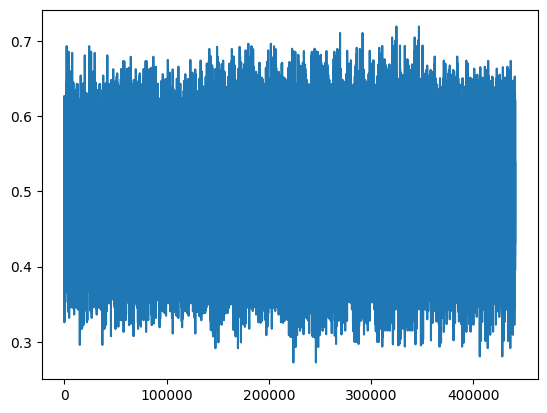

In [61]:
plt.plot(pre_res[2])

In [15]:
for num in range(10):
    write(f'music_gener/music17-1{num}.wav', sample_rate, pre_res[num*50])
    # write(f'music_gener/music17_ori_{num}.wav', sample_rate, ori[num*50])

In [ ]:
# save all info
model_list = os.listdir('/models')
os.mkdir(f'/models/{model_list[-1]+1}')
model.save(f'/models/{model_list[-1]+1}/model')
np.save(f'/models/{model_list[-1]+1}/music_data.npy', pre_res)